# Import modules

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

In [107]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\cirrho\\cirrhosis.csv')
data.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [108]:
data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [109]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [110]:
data.nunique()

ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

In [111]:
data['Edema'].value_counts()

N    354
S     44
Y     20
Name: Edema, dtype: int64

In [112]:
data['Bilirubin'].value_counts()

0.7     33
0.6     31
0.5     23
0.8     23
1.1     20
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: Bilirubin, Length: 98, dtype: int64

In [113]:
data['Age'].value_counts()

19724    7
18993    6
18628    6
23376    5
22646    5
        ..
15574    1
19295    1
18713    1
20256    1
12784    1
Name: Age, Length: 344, dtype: int64

# Preprocessing of dataset

In [114]:
data.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [115]:
# for numerical
data.select_dtypes(include=(['int64', 'float64'])).isna().sum()
data_num_col = data.select_dtypes(include=(['int64', 'float64'])).columns
for c in data_num_col:
    data[c].fillna(data[c].median(), inplace=True)

data.select_dtypes(include=(['int64', 'float64'])).isna().sum()

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [116]:
# For Categorical type
data.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [117]:
data_col = data.select_dtypes(include=('object')).columns
for c in data_col:
    data[c].fillna(data[c].mode().values[0], inplace=True)
    
data.select_dtypes(include=('object')).isnull().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

# Correlation matrix

In [118]:
data.corr()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,-0.069327,-0.128924,-0.171115,-0.350981,-0.060318,-0.110382,-0.076032,-0.191959,-0.033911
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.146144,-0.110685,-0.362013
Age,0.037136,-0.125934,1.000000,0.002362,-0.145054,-0.182350,0.034519,-0.060708,-0.139050,0.002323,-0.146383,0.113916,0.187852
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.336882,-0.314177,0.403761,0.104675,0.392112,0.370330,-0.012988,0.312007,0.200314
Cholesterol,-0.069327,-0.099322,-0.145054,0.336882,1.000000,-0.043022,0.145910,0.157995,0.347222,0.291750,0.159034,-0.027259,0.009930
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.043022,1.000000,-0.209024,-0.070010,-0.180947,-0.068509,0.155421,-0.198405,-0.302190
Copper,-0.171115,-0.295723,0.034519,0.403761,0.145910,-0.209024,1.000000,0.207349,0.298923,0.292236,-0.039929,0.182494,0.232149
Alk_Phos,-0.350981,0.152368,-0.060708,0.104675,0.157995,-0.070010,0.207349,1.000000,0.122071,0.186250,0.133573,0.073408,0.037905
SGOT,-0.060318,-0.187930,-0.139050,0.392112,0.347222,-0.180947,0.298923,0.122071,1.000000,0.130853,-0.093715,0.094550,0.143568
Tryglicerides,-0.110382,-0.111453,0.002323,0.370330,0.291750,-0.068509,0.292236,0.186250,0.130853,1.000000,0.088892,0.014831,0.099879


<AxesSubplot:>

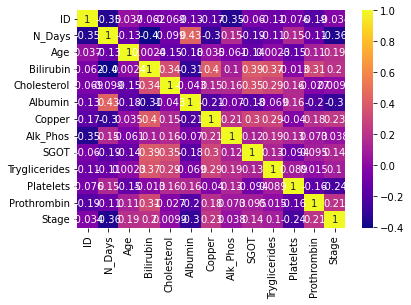

In [119]:
sns.heatmap(data.corr(),annot=True,cmap='plasma')

# Data Visualization

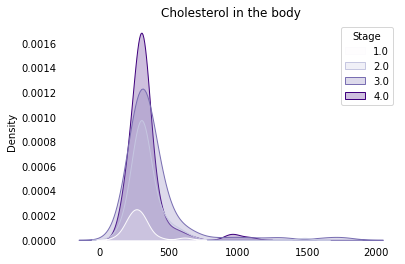

In [120]:

sns.kdeplot(data['Cholesterol'], hue=data['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol in the body');

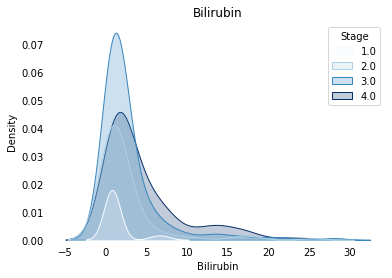

In [121]:
sns.kdeplot(data['Bilirubin'], hue=data['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.title('Bilirubin');

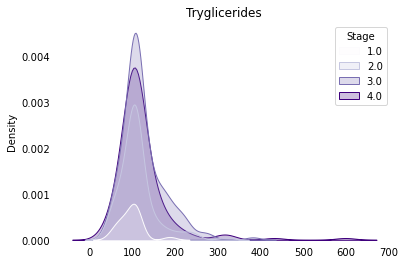

In [122]:

sns.kdeplot(data['Tryglicerides'], hue=data['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

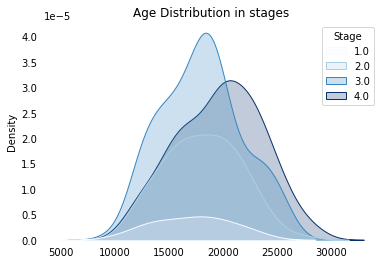

In [123]:
sns.kdeplot(data['Age'], hue=data['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

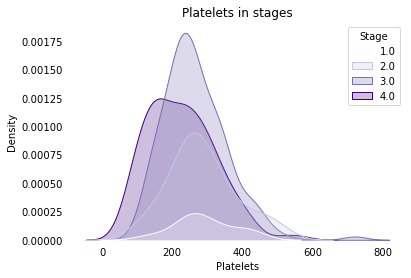

In [124]:
sns.kdeplot(data['Platelets'], hue=data['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.title('Platelets in stages');

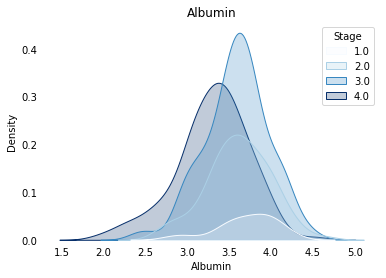

In [125]:
sns.kdeplot(data['Albumin'], hue=data['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.title('Albumin');

Text(0.5, 1.0, 'Disease Stage Across Gender')

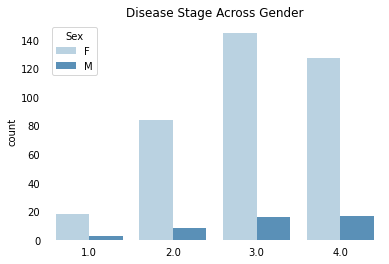

In [126]:
sns.countplot(x=data['Stage'], hue=data['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')


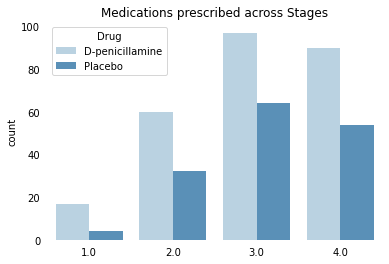

In [127]:
sns.countplot(x=data['Stage'], hue=data['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

# Replacing catagorical data with intigers

In [128]:
data['Sex'] = data['Sex'].replace({'M':0, 'F':1})                                
data['Ascites'] = data['Ascites'].replace({'N':0, 'Y':1})                         
data['Drug'] = data['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          
data['Hepatomegaly'] = data['Hepatomegaly'].replace({'N':0, 'Y':1})             
data['Spiders'] = data['Spiders'].replace({'N':0, 'Y':1})                       
data['Edema'] = data['Edema'].replace({'N':0, 'Y':1, 'S':-1})                
data['Status'] = data['Status'].replace({'C':0, 'CL':1, 'D':-1}) 

In [129]:
data.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,-1,0,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,-1,0,25594,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,-1,0,19994,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Train and Test

In [130]:
# Setting up Features and Target
X = data.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = data.pop('Stage')

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=5000, solver='saga')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test):
   X_train = train
   y_train = y.iloc[train_index]
   X_test = test
   y_test = y.iloc[test_index]
   log_model.fit(X_train, y_train)
   score = log_model.score(X_test,y_test)
   acc.append(score)

In [153]:
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test)

print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))


Logestic Regression Mean Accuracy =  0.46138211382113825


In [157]:
from sklearn.metrics import classification_report
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         9
         3.0       0.32      0.50      0.39        16
         4.0       0.44      0.50      0.47        14

    accuracy                           0.37        41
   macro avg       0.19      0.25      0.21        41
weighted avg       0.27      0.37      0.31        41



C:\Users\USER\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
